In [1]:
import numpy as np
import hicplotlib as hpl
import matplotlib.pyplot as plt
import seaborn as sns #Recommend upgrading to new seaborn 0.6
import pandas as pd
from __future__ import division
sns.set_color_codes()
%pylab inline
#I suggest you run it without inline mode as this way figures are quite cluttered

Populating the interactive namespace from numpy and matplotlib


In [2]:
settings = hpl.HiCParameters()
settings.resolution=20000
settings.set_chromosomes(['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX'])
settings.set_chromosomes_lengths([23011544, 21146708, 24543557, 27905053, 1351857, 22422827])
#Can be also done by parsing a file with chromosome names and lengths with settings.set_chromosomes_from_chrfile
gi = hpl.GenomicIntervals(settings)

Loading a Hi-C matrix, do it any way you prefer to get your data.

In [3]:
s2 = np.loadtxt('../../../Documents/biology/Drosophila_cells_Hi-C/S2/IC-heatmap-20K.mtx')

This is how it looks, just a symmetrical matrix. The diagonal has been removed here, so zeroes in the middle.

In [4]:
s2

array([[   0.        ,    0.        ,  260.9097313 , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    7.14010218,
           0.        ,    0.        ],
       [ 260.9097313 ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   0.        ,    7.14010218,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

Now let's call the TADs. It is done via greendale (https://bitbucket.org/nvictus/greendale/) which needs to be installed separately. Let's first use Potts segmentation

In [5]:
gammas = list(np.linspace(0, 0.9, 10))+range(1, 10)+range(10, 155, 5)
s2_tads = gi.find_TADs(s2, gammalist=gammas, segmentation='potts')
s2_tads['Segmentation'] = 'Potts'

And now let's try Armatus segmentation (implementation of the Armatus algorithm from (Filippova et al, 2013)). This takes much longer.

In [6]:
s2_tads_arm = gi.find_TADs(s2, gammalist=gammas, segmentation='armatus')
s2_tads_arm['Segmentation'] = 'Armatus'

Let's combine the data from both algorithms in a long-style DataFrame so it's easier to analyse it.

In [7]:
s2_tads_all = pd.concat([s2_tads, s2_tads_arm])
s2_tads_all.sort(['Segmentation', 'Gamma', 'Chromosome', 'Start', 'End'], inplace=True)

Sometimes the algorithms produce TADs with no interactions inside from empty regions of the map. Let's calculate TADs densities (as a sum of interactions inside the TAD) and only keep TADs with Density>0. We'll use the Density values themselves later.

In [8]:
s2_tads_all['Density'] = gi.get_intervals_density(s2_tads_all[['Chromosome', 'Start', 'End']], s2)
s2_tads_all = s2_tads_all.query('Density>0').copy() #Copying to shut up the warning later

Let's now have a look at those TADs by segmentation method separately.

In [9]:
s2_tads_all.query('Segmentation=="Potts"')

,Chromosome,Start,End,Score,Gamma,Segmentation,Density
6,chrX,20000,22420000,7.304673e-05,0.2,Potts,1616658.021578
7,chr2L,0,22980000,0.000000e+00,0.3,Potts,1568798.741903
8,chr2R,0,21120000,-1.725084e-08,0.3,Potts,1530625.980212
10,chr3L,20000,24520000,7.299411e-05,0.3,Potts,1704009.275085
11,chr3R,0,27880000,1.512680e-04,0.3,Potts,2049342.378658
13,chr4,60000,1280000,2.288399e-04,0.3,Potts,74698.403842
15,chr2L,0,22980000,0.000000e+00,0.4,Potts,1568798.741903
16,chr2R,0,21120000,-2.300113e-08,0.4,Potts,1530625.980212
18,chr3L,20000,24520000,7.294148e-05,0.4,Potts,1704009.275085
19,chr3R,0,27880000,1.511543e-04,0.4,Potts,2049342.378658


In [10]:
s2_tads_all.query('Segmentation=="Armatus"')

,Chromosome,Start,End,Score,Gamma,Segmentation,Density
0,chr2L,0,120000,0.000000e+00,0,Armatus,1537.835040
1,chr2L,120000,420000,0.000000e+00,0,Armatus,8022.509153
3,chr2L,520000,2200000,3.953268e-05,0,Armatus,78606.454375
4,chr2L,2200000,2740000,4.979363e-05,0,Armatus,16909.838062
5,chr2L,2740000,2860000,5.581178e-05,0,Armatus,1488.232518
6,chr2L,2880000,2980000,5.581178e-05,0,Armatus,898.795489
7,chr2L,2980000,3040000,5.581178e-05,0,Armatus,176.626655
8,chr2L,3060000,3460000,8.501820e-05,0,Armatus,10557.792114
9,chr2L,3480000,4820000,1.417163e-04,0,Armatus,56008.160298
10,chr2L,4820000,4960000,1.593261e-04,0,Armatus,1573.333003


Seems like it worked, but we only saw the head and tail of the tables... Let's just now see some statistics across all gamma values we used. First let's have a look at lengths of called TADs. Coverage shows percentage of the genome covered by TADs.

In [11]:
gi.describe_TADs(s2_tads_all.query('Segmentation=="Potts"'))

,count,median,mean,amin,amax,coverage
Gamma,,,,,,
0.2,1,22400000,22400000.000000,22400000,22400000,0.186075
0.3,5,22980000,19540000.000000,1220000,27880000,0.811586
0.4,5,22980000,19540000.000000,1220000,27880000,0.811586
0.5,5,22980000,19540000.000000,1220000,27880000,0.811586
0.6,5,22980000,19540000.000000,1220000,27880000,0.811586
0.7,8,15580000,15012500.000000,1220000,24500000,0.997661
0.8,8,15580000,15012500.000000,1220000,24500000,0.997661
0.9,8,15580000,15012500.000000,1220000,24500000,0.997661
1.0,9,12960000,13344444.444444,1220000,22400000,0.997661


In [12]:
gi.describe_TADs(s2_tads_all.query('Segmentation=="Armatus"'))

,count,median,mean,amin,amax,coverage
Gamma,,,,,,
0.0,177,140000,667796.610169,60000,27880000,0.981878
0.1,400,140000,290700.000000,60000,22400000,0.965929
0.2,542,120000,211180.811808,60000,2460000,0.950810
0.3,606,120000,187689.768977,60000,1980000,0.944829
0.4,651,120000,173794.162826,60000,1980000,0.939845
0.5,681,120000,165638.766520,60000,1580000,0.937021
0.6,728,100000,154065.934066,60000,1580000,0.931704
0.7,773,100000,144967.658473,60000,1420000,0.930874
0.8,823,100000,136257.594168,60000,1420000,0.931538


OK, now let's use another column for statistics - Score.

In [13]:
gi.describe_TADs(s2_tads_all.query('Segmentation=="Potts"'), feature='Score')

,count,median,mean,amin,amax
Gamma,,,,,
0.2,1,0.000073,0.000073,7.304673e-05,0.000073
0.3,5,0.000073,0.000091,-1.725084e-08,0.000229
0.4,5,0.000073,0.000091,-2.300113e-08,0.000229
0.5,5,0.000073,0.000090,-2.875141e-08,0.000228
0.6,5,0.000073,0.000090,-3.450169e-08,0.000228
0.7,8,0.000150,0.000166,-2.023317e-08,0.000463
0.8,8,0.000149,0.000166,-2.312363e-08,0.000463
0.9,8,0.000149,0.000166,-2.601408e-08,0.000462
1.0,9,0.000150,0.000190,-2.890453e-08,0.000549


In [14]:
gi.describe_TADs(s2_tads_all.query('Segmentation=="Armatus"'), feature='Score')

,count,median,mean,amin,amax
Gamma,,,,,
0.0,177,1.771099e-03,1.595463e-03,0,2.895538e-03
0.1,400,2.202742e-03,2.018375e-03,0,3.392792e-03
0.2,542,1.942311e-03,1.858329e-03,0,3.292132e-03
0.3,606,1.636220e-03,1.534395e-03,0,2.915450e-03
0.4,651,1.311326e-03,1.271853e-03,0,2.384720e-03
0.5,681,1.073023e-03,1.037980e-03,0,1.977402e-03
0.6,728,8.896685e-04,8.730915e-04,0,1.709639e-03
0.7,773,7.369949e-04,7.286892e-04,0,1.464114e-03
0.8,823,6.185251e-04,6.125252e-04,0,1.223590e-03


Nice! Now let's visualise some of these things easily in a pretty way with seaborn.

Let's see how many TADs we get depending on gamma and segmentation method.

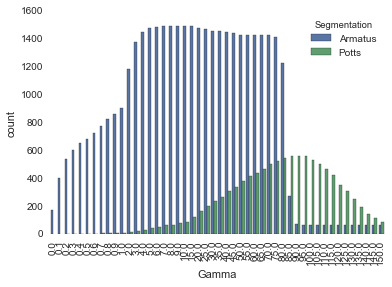

In [15]:
sns.countplot(x='Gamma', hue='Segmentation', data=s2_tads_all)
plt.xticks(rotation=90)
plt.show()

Let's compare the lengths of TADs depending on gamma with these two segmentation methods.

In [16]:
s2_tads_all['Length'] = s2_tads_all['End']-s2_tads_all['Start']
s2_tads_all['Length'] = s2_tads_all['Length'].astype(int)

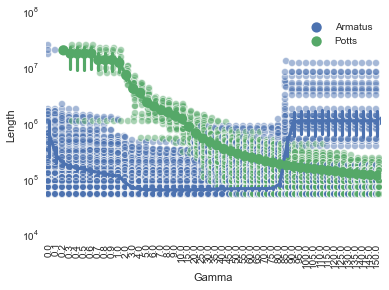

In [17]:
sns.pointplot(x='Gamma', y='Length', hue='Segmentation', data=s2_tads_all, zorder=15)
sns.stripplot(x='Gamma', y='Length', hue='Segmentation', data=s2_tads_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels() #Have to do this because of a weird legend behavior otherwise...
plt.legend(handles[:2], labels[:2], loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

And again, let's look at the Score in the same way.

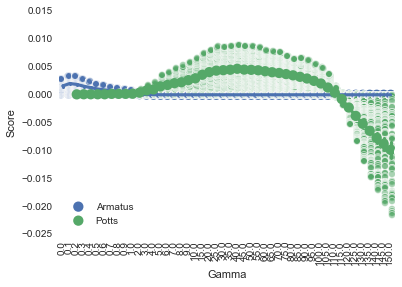

In [18]:
sns.pointplot(x='Gamma', y='Score', hue='Segmentation', data=s2_tads_all, zorder=15)
sns.stripplot(x='Gamma', y='Score', hue='Segmentation', data=s2_tads_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], loc='lower left')
plt.xticks(rotation=90)
plt.show()

Not really visible for Armatus, let's plot it separately now.

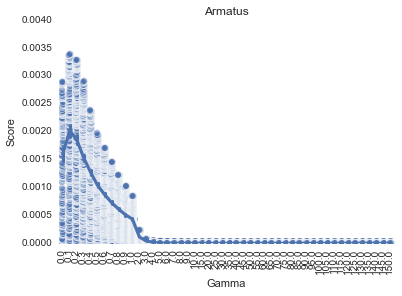

In [19]:
sns.pointplot(x='Gamma', y='Score', data=s2_tads_all.query('Segmentation=="Armatus"'), zorder=15)
sns.stripplot(x='Gamma', y='Score', data=s2_tads_all.query('Segmentation=="Armatus"'), color='b', jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.xticks(rotation=90)
plt.ylim(ymin=0)
plt.title('Armatus')
plt.show()

Now let's compare TAD densities, i.e. sum of interactions inside each TAD, across gamma values. As you might remember, we have already calculated it before to remove empty TADs.

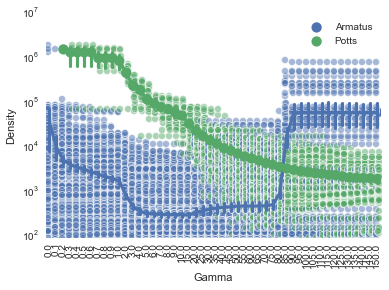

In [20]:
sns.pointplot(x='Gamma', y='Density', hue='Segmentation', data=s2_tads_all, zorder=15)
sns.stripplot(x='Gamma', y='Density', hue='Segmentation', data=s2_tads_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Looks really similar to the plot with lengths we got earlier. Well, obviously, the way we defined density is strongly dependent on TAD length! Let's try to fix it: we shall divide the Density by Length^2 and hopefully get rid of this bias at least on average. You can actually do it from the very beginning by passing norm='square' to gi.get_intervals_density() method. For accurate comparison either use observed over expected calculation, or only compare TADs of the same length with each other.

In [21]:
s2_tads_all['Density'] /= s2_tads_all['Length']**2

Both algorithms are somehow based on "density" calculation, so we see a clear relationship between Gamma and Density, especially for the more stable Potts segmentation. High density values seem to be a good clue for finding an optimal Gamma value.

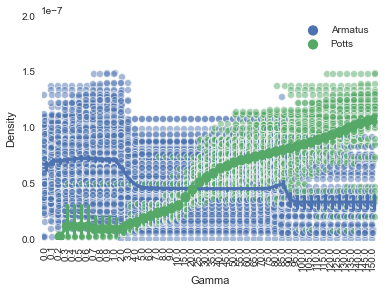

In [22]:
sns.pointplot(x='Gamma', y='Density', hue='Segmentation', data=s2_tads_all, zorder=15)
sns.stripplot(x='Gamma', y='Density', hue='Segmentation', data=s2_tads_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], loc='upper right')
plt.xticks(rotation=90)
plt.ylim(ymin=0)
plt.show()

Now calculating TAD borders strength. Let's use pandas.groupby to apply it to all Gamma values and both segmentation methods and keep information about them at the same time.

Strength by default is calculated as ratio of sum of intra-TAD interactions of two neighbouring TADs to inter-TAD interactions of those TADs with each other.

In [23]:
s2_l = []
grouped = s2_tads_all.groupby(['Gamma', 'Segmentation'])
for (g, s), d in grouped:
    if len(d.index)>1:
        a = gi.get_borders_strength(d.copy(), s2)
    a['Gamma'] = g
    a['Segmentation'] = s
    s2_l.append(a)
s2_strengths_all = pd.concat(s2_l)

Now let's compare the strengths we are getting.

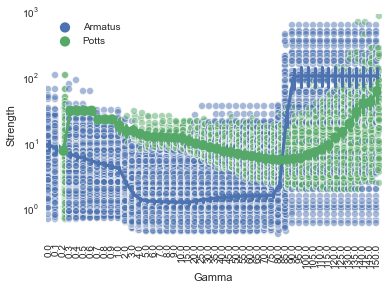

In [24]:
sns.pointplot(x='Gamma', y='Strength', hue='Segmentation', data=s2_strengths_all, zorder=15)
sns.stripplot(x='Gamma', y='Strength', hue='Segmentation', data=s2_strengths_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], loc='upper left')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylim(ymin=0.4)
plt.show()

Interestingly, the dependency is not quite the same as for Density.

Overall, obviously, this dataset requires very different gamma values in these two algorithms: <=1 for Armatus and 70-100 for Potts. Remember to take into account number of TADs you are getting as well as their properties, such as length. Unfortunately there is no single rule and gamma has to be defined empirically. The best judge here is our eye when comparing TAD calls to the heatmap. This will be covered in a different example.